In [ ]:
!pip install feature-engine

# ***Loading Data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ***Data Visualisation***

### Categorical Columns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/dataframe.csv")

Mounted at /content/drive


In [ ]:
object_cols = df.select_dtypes(include=['object'])
object_cols = object_cols.drop(columns=['Policy Start Date'])

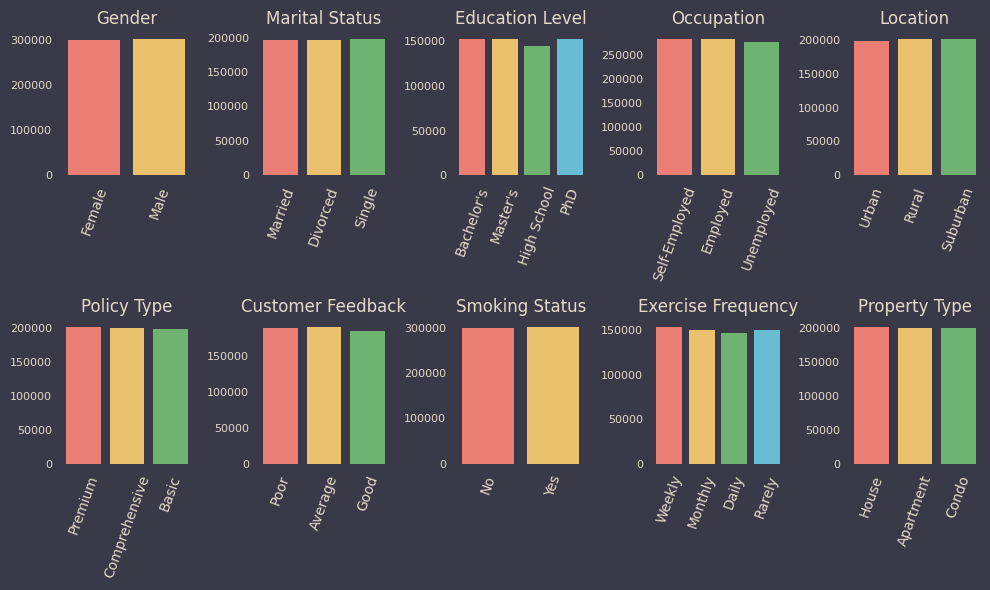

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
m = 0
for i in range(2):
    for j in range(5):
        sns.countplot(df, x=object_cols.columns.tolist()[m], ax=axs[i, j], palette=["#FF6F61", "#FFC857", "#62BF68", "#57C8E5", "#FCA311"])
        axs[i, j].set_ylabel('')
        axs[i, j].set_xlabel('')

        axs[i, j].tick_params(axis='y', colors='#3a3947')
        axs[i, j].tick_params(axis='x', colors='#3a3947')

        axs[i, j].tick_params(axis='y', labelsize=8)
        axs[i, j].title.set_text(object_cols.columns.tolist()[m])
        axs[i,j].title.set_color('#e3dac9')

        axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=70, horizontalalignment='center',color='#e3dac9')
        axs[i,j].set_yticklabels(axs[i, j].get_yticklabels(),color='#e3dac9')

        axs[i,j].set_facecolor('#3a3947')

        axs[i,j].spines['left'].set_visible(False)
        axs[i,j].spines['right'].set_visible(False)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].spines['bottom'].set_visible(False)



        m += 1
fig.tight_layout()
fig.patch.set_facecolor('#3a3947')
plt.show()
fig.savefig('1.png', dpi=300, bbox_inches='tight')

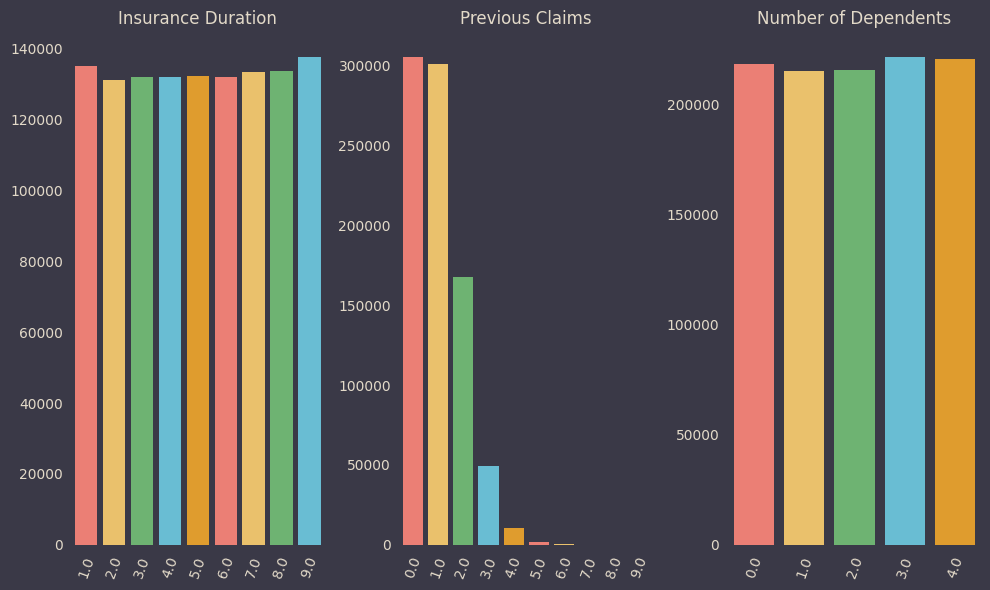

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(10,6))
rest_cat_cols = ['Insurance Duration','Previous Claims','Number of Dependents']
for i in range(3):
    sns.countplot(data=df,x=rest_cat_cols[i],ax=ax[i],palette=["#FF6F61", "#FFC857", "#62BF68", "#57C8E5", "#FCA311"])
    ax[i].tick_params(colors='#3a3947')
    ax[i].set_ylabel('')

    ax[i].set_yticklabels(ax[i].get_yticklabels(),color='#e3dac9')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=70, horizontalalignment='center',color='#e3dac9')
    ax[i].set_facecolor('#3a3947')

    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)

    ax[i].set_title(rest_cat_cols[i],color='#e3dac9')

    ax[i].set_xlabel('')

fig.tight_layout()
fig.set_facecolor('#3a3947')
fig.savefig('2.png', dpi=300, bbox_inches='tight')

### Percentage share of NA values

In [ ]:
na_series = df.isna().sum().sort_values(ascending=False)
reduced_na_series = na_series[na_series > 0][:-2]
reduced_na_series = reduced_na_series.apply(lambda x: x/len(df))

reduced_na_series["Others"] = reduced_na_series[reduced_na_series < 0.06].values.sum()
reduced_na_series = reduced_na_series.drop(['Marital Status',"Age","Annual Income"])

In [ ]:
cumSum = reduced_na_series.cumsum()
names = cumSum.index[:-1].tolist()+["Others"]

text_levels = []
for i,value in enumerate(cumSum.values):

    if i == 0:
        text_levels.append(value/2)
    else:
        text_levels.append((value + cumSum.values[i-1])/2)

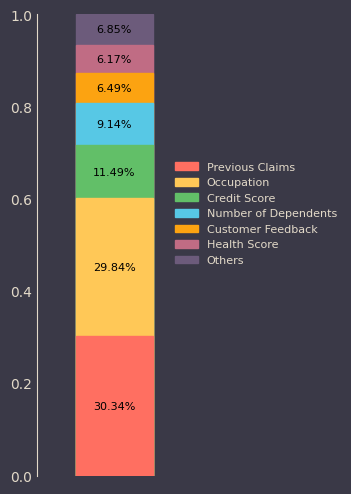

In [ ]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(2, 6))
palette = [
    "#FF6F61",  "#FFC857",  "#62BF68","#57C8E5","#FCA311",
    "#C06C84","#6C5B7B", "#355070",  "#355070", "#355070"]
for i in range(len(cumSum)):
    if i==len(cumSum)-1:
        rect = patches.Rectangle((0.45, 0), 0.1, cumSum[i], linewidth=1, color=palette[i],label='Others')
    else:
        rect = patches.Rectangle((0.45, 0), 0.1, cumSum[i], linewidth=1, color=palette[i],label=names[i])
    ax.add_patch(rect)
    rect.set_zorder(len(cumSum) - i)

for i in range(len(cumSum)):
    ax.text(0.5, text_levels[i]+0.01, s=f"{round(reduced_na_series[i]*100,2)}%", ha='center', va='top', color='black', zorder=len(cumSum) + 1,
            fontsize=8)

ax.set_xlim(0.4, 0.6)
ax.set_xticks([])
ax.set_yticklabels(labels=ax.get_yticklabels(), color='#e3dac9')

ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0)

ax.set_ylim(0, cumSum.max())
ax.tick_params()
ax.set_facecolor('#3a3947')
ax.spines['left'].set_color('#e3dac9')
ax.spines['right'].set_color('#e3dac9')
ax.spines['top'].set_color('#e3dac9')
ax.spines['bottom'].set_color('#e3dac9')

ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(loc='upper right', bbox_to_anchor=(2, 0.7), facecolor='#3a3947', edgecolor='#3a3947', fontsize=8, labelcolor='#e3dac9')
ax.set_title('Percentage share of Na values')
fig.set_facecolor('#3a3947')
fig.savefig('3.png', dpi=300, bbox_inches='tight')

### Distribution of Na in Data Frame

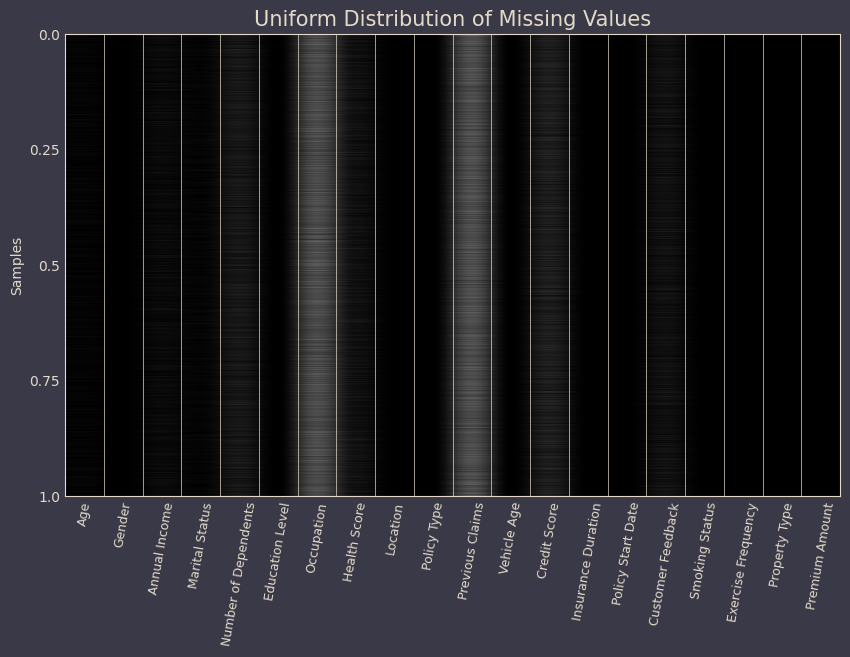

In [ ]:
from sklearn.impute import MissingIndicator
NA = df.iloc[3,6]

without_id = df.drop(columns=["id"])

indicator = MissingIndicator(missing_values=np.nan, features='all')
mask_missing_values_only = indicator.fit_transform(without_id)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(mask_missing_values_only, aspect='auto', cmap='bone')
ax.invert_yaxis()
ax.set_ylabel('Samples')
ax.set_yticks(np.linspace(0, len(df), num=5))
ax.set_yticklabels(np.linspace(0, 1, num=5),color='#e3dac9')
ax.set_ylabel('Samples',color='#e3dac9')

ax.set_xticks(np.arange(len(without_id.columns)))
ax.set_xticklabels(without_id.columns.tolist(), rotation=80, fontsize=9,color='#e3dac9')
ax.invert_yaxis()
fig.patch.set_facecolor('#3a3947')
ax.set_title('Uniform Distribution of Missing Values',color='#e3dac9',fontsize=15)

ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=0)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)

ax.spines['left'].set_color('#e3dac9')
ax.spines['bottom'].set_color('#e3dac9')
ax.spines['right'].set_color('#e3dac9')
ax.spines['top'].set_color('#e3dac9')


for i in range(len(without_id.columns)):
    ax.axvline(i - 0.5, color='#e3dac9', linestyle='-', linewidth=0.5)
fig.savefig('4.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
m = 0
for i in range(2):
    for j in range(5):
        sns.countplot(df, x=object_cols.columns.tolist()[m], ax=axs[i, j], palette=["#FF6F61", "#FFC857", "#62BF68", "#57C8E5", "#FCA311"])
        axs[i, j].set_ylabel('')
        axs[i, j].set_xlabel('')

        axs[i,j].tick_params(color='#e3dac9')

        axs[i, j].tick_params(axis='y', labelsize=8)
        axs[i, j].title.set_text(object_cols.columns.tolist()[m])
        axs[i,j].title.set_color('#e3dac9')

        axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=70, horizontalalignment='center',color='#e3dac9')
        axs[i,j].set_yticklabels(axs[i, j].get_yticklabels(),color='#e3dac9')

        axs[i,j].set_facecolor('#2E2E38')

        axs[i,j].spines['left'].set_visible(False)
        axs[i,j].spines['right'].set_visible(False)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].spines['bottom'].set_visible(False)

        m += 1
fig.tight_layout()
fig.patch.set_facecolor('#2E2E38')
plt.show()

### Distribution of continues variables

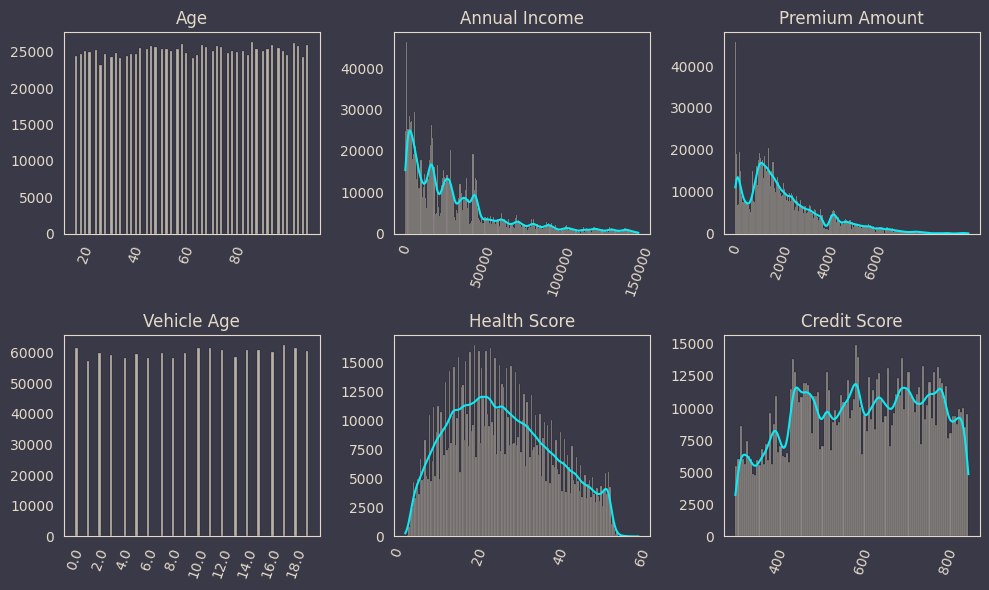

In [ ]:
continues_col = ["Age", "Annual Income", "Premium Amount", "Vehicle Age","Health Score","Credit Score"]

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
idx = 0
for i in range(2):
    for j in range(3):
        ax[i,j].tick_params(axis='y', colors='#3a3947')
        ax[i,j].tick_params(axis='x', colors='#3a3947')
        if continues_col[idx]!= 'Age' and continues_col[idx] != 'Vehicle Age':

            sns.histplot(df[continues_col[idx]], ax=ax[i, j], color='#e3dac9',kde=True)
            ax[i,j].lines[0].set_color('#0DEAF2')
        else:
            sns.histplot(df[continues_col[idx]], ax=ax[i, j], color='#e3dac9')

        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=70, color='#e3dac9')
        ax[i, j].set_yticklabels(ax[i, j].get_yticklabels(), color='#e3dac9')

        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')

        ax[i, j].set_title(continues_col[idx], color='#e3dac9')

        ax[i, j].set_facecolor('#3a3947')
        if continues_col[idx] == "Vehicle Age":
            ax[i, j].set_xticks(np.arange(0, df[continues_col[idx]].max() + 1, step=2))
            ax[i, j].set_xticklabels(np.arange(0, df[continues_col[idx]].max() + 1, step=2), rotation=70, color='#e3dac9')
        idx += 1

        ax[i,j].spines['left'].set_color('#e3dac9')
        ax[i,j].spines['right'].set_color('#e3dac9')
        ax[i,j].spines['top'].set_color('#e3dac9')
        ax[i,j].spines['bottom'].set_color('#e3dac9')

fig.tight_layout()
fig.set_facecolor('#3a3947')
fig.savefig('5.png', dpi=300, bbox_inches='tight')

### Date

In [ ]:
df["Year"] = df["Policy Start Date"].apply(lambda x: x[0:4])
df["Month"] = df["Policy Start Date"].apply(lambda x: x[5:7])
df["Day"] = df["Policy Start Date"].apply(lambda x: x[8:10])
df["Day_of_Week"] = pd.to_datetime(df["Date"]).dt.day_name()
df["Time"] = df["Policy Start Date"].apply(lambda x: int(x[20:]))

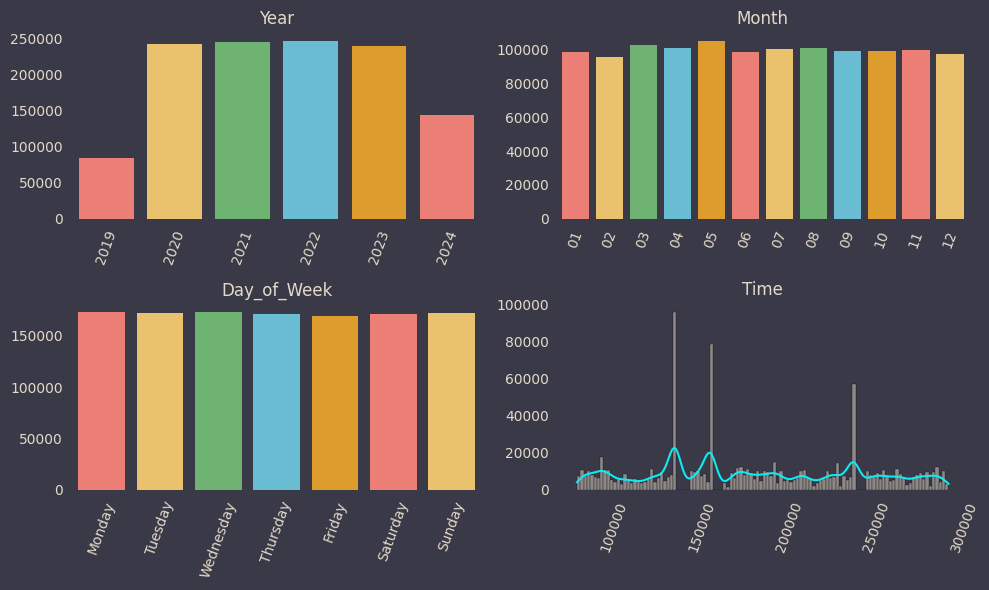

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,6))
data_columns = ["Year","Month","Day_of_Week","Time"]
m=0
for i in range(2):
    for j in range(2):
        if data_columns[m] == 'Time':
            sns.histplot(df[data_columns[m]],ax=ax[i,j],color='#e3dac9',kde=True)
            ax[i,j].lines[0].set_color('#0DEAF2')
        elif data_columns[m] == 'Day_of_Week':

            sorted_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
            sns.countplot(df,x=data_columns[m],ax=ax[i,j],palette=["#FF6F61", "#FFC857", "#62BF68", "#57C8E5", "#FCA311"],
                          order = sorted_order)
        elif data_columns[m] == 'Month':

            sorted_order = ['01','02','03','04','05','06','07','08','09','10','11','12']
            sns.countplot(df,x=data_columns[m],ax=ax[i,j],palette=["#FF6F61", "#FFC857", "#62BF68", "#57C8E5", "#FCA311"],
                          order = sorted_order)

        else:
            sorted_order = sorted(df[data_columns[m]].unique())
            sns.countplot(df,x=data_columns[m],ax=ax[i,j],palette=["#FF6F61", "#FFC857", "#62BF68", "#57C8E5", "#FCA311"],
                          order = sorted_order)




        ax[i,j].tick_params(axis='y', colors='#3a3947')
        ax[i,j].tick_params(axis='x', colors='#3a3947')

        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')

        ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(),rotation=70,color='#e3dac9')
        ax[i,j].set_yticklabels(ax[i,j].get_yticklabels(),color='#e3dac9')
        ax[i,j].set_title(data_columns[m],color='#e3dac9')

        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)


        ax[i,j].set_facecolor('#3a3947')

        m+=1

fig.tight_layout()
fig.set_facecolor('#3a3947')
fig.savefig('6.png', dpi=300, bbox_inches='tight')

### Correlation

In [ ]:
import matplotlib.colors as mcolors

custom_cmap = mcolors.LinearSegmentedColormap.from_list(name = "New",colors=['#E8D0A6','#A11717'])

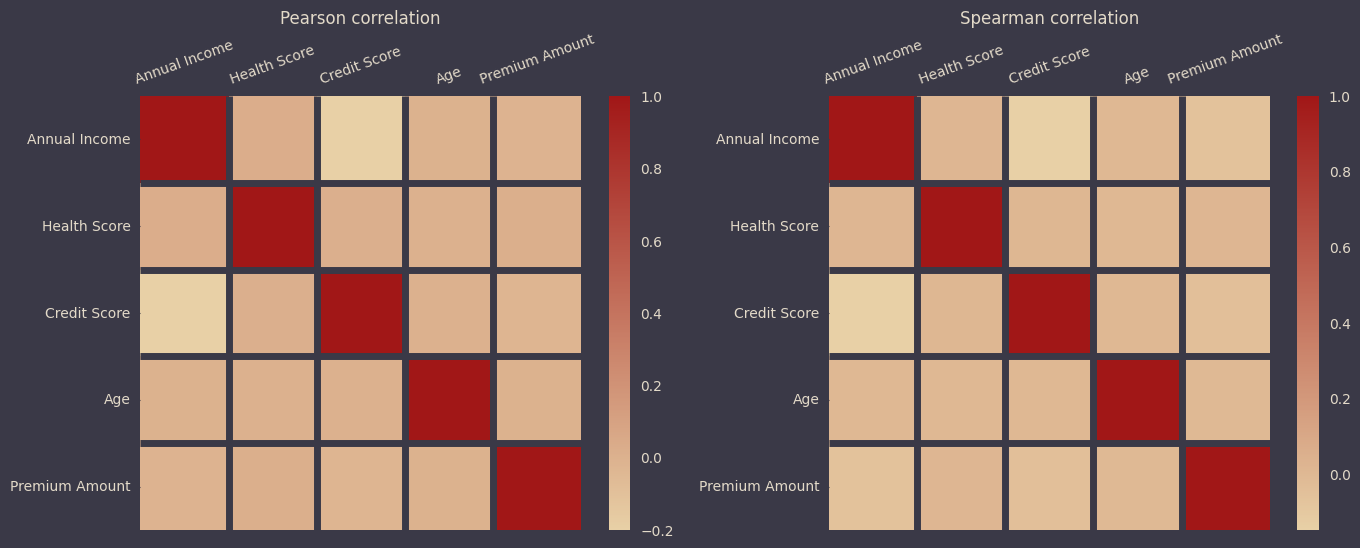

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
numerical_cols = ["Annual Income", "Health Score","Credit Score","Age","Premium Amount"]
sns.heatmap(df[numerical_cols].corr('pearson'),ax=ax[0],cmap=custom_cmap)
sns.heatmap(df[numerical_cols].corr('spearman'),ax=ax[1],cmap=custom_cmap)
fig.tight_layout()

ax[0].set_title("Pearson correlation",color='#e3dac9')
ax[1].set_title("Spearman correlation",color='#e3dac9')

ax[0].tick_params(color='#3a3947')
ax[1].tick_params(color='#3a3947')

ax[0].tick_params(labeltop=True,labelbottom=False)
ax[1].tick_params(labeltop=True,labelbottom=False)

ax[0].set_xticklabels(labels = ax[0].get_xticklabels(),color='#e3dac9',rotation=20)
ax[0].set_yticklabels(labels = ax[0].get_yticklabels(),color='#e3dac9')

ax[1].set_xticklabels(labels = ax[1].get_xticklabels(),color='#e3dac9',rotation=20)
ax[1].set_yticklabels(labels = ax[1].get_yticklabels(),color='#e3dac9')

ax[0].vlines(np.array([0.5,1.5,2.5,3.5])+0.5,0,5,linewidth=5,color='#3a3947')
ax[0].hlines(np.array([0.5,1.5,2.5,3.5])+0.5,0,5,linewidth=5,color='#3a3947')

ax[1].vlines(np.array([0.5,1.5,2.5,3.5])+0.5,0,5,linewidth=5,color='#3a3947')
ax[1].hlines(np.array([0.5,1.5,2.5,3.5])+0.5,0,5,linewidth=5,color='#3a3947')

cbar = ax[0].collections[0].colorbar
cbar.ax.tick_params(axis='y', color='#3a3947', labelcolor='#e3dac9')

cbar = ax[1].collections[0].colorbar
cbar.ax.tick_params(axis='y', color='#3a3947', labelcolor='#e3dac9')

fig.set_facecolor('#3a3947')
fig.savefig('7.png', dpi=300, bbox_inches='tight')

# ***Scikit Learn***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from feature_engine.transformation import BoxCoxTransformer, YeoJohnsonTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, TargetEncoder
from feature_engine.outliers import OutlierTrimmer
from feature_engine.imputation import RandomSampleImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### KNN

#### Finding the best n_neighbors parameter with elbow method

In [ ]:
def process_train_data_knn(df):
    numerical_cols = ["Annual Income","Credit Score","Health Score"]

    numerical_scaler = Pipeline(
        steps=[
            ('imputer_num', SimpleImputer(strategy='mean',missing_values=np.nan)),
            ('scaler', StandardScaler())
        ]
    )
    transformer = ColumnTransformer(
        transformers=[
            ('numeric_imputer',numerical_scaler,numerical_cols)
        ]
    )
    return transformer.fit_transform(df)

In [ ]:
X_train = process_train_data_knn(df)
Y_train = np.log(df["Premium Amount"])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in np.arange(1,20,1):
    model = KNeighborsRegressor(weights='distance',n_neighbors=i)

    score = cross_val_score(model,X_train,Y_train,cv=5,scoring='neg_root_mean_squared_error')
    scores.append(score)
    print(f"{i}:{score.mean()*-1}")

In [ ]:
scores = [1.5265357175111398,
 1.3291995150983438,
 1.2555401924330574,
 1.2164209520611033,
 1.191743973479251,
 1.1754076173612724,
 1.163466705691607,
 1.154383177715188,
 1.1471221950205206,
 1.1413341462758289,
 1.1366298754566937,
 1.1325617278827722,
 1.129124733153199,
 1.1261734817475797,
 1.1236110275180553,
 1.1214259316621904,
 1.119444992587558,
 1.1176051970183,
 1.1160913061958897]

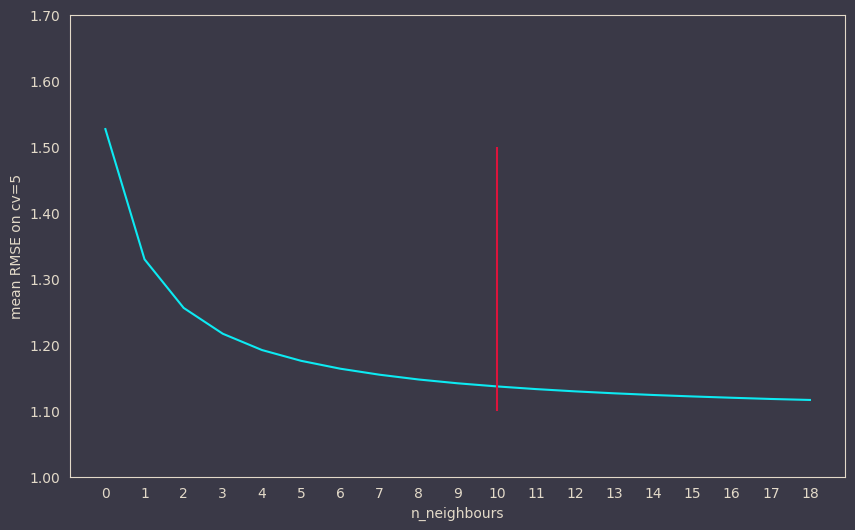

In [ ]:
import matplotlib.ticker as ticker

fig,ax = plt.subplots(figsize=(10,6))



data = pd.DataFrame(scores_mean)
data.reset_index(inplace=True)
data.columns = ['Index', 'Scores']


sns.lineplot(data=data,x=data['Index'],y=data['Scores'],ax=ax)
ax.set_xticks(data.index)

ax.set_ylim(1, 1.7)
ax.set_xticklabels(labels = ax.get_xticks(),color='#e3dac9')
ax.set_yticklabels(labels = ax.get_yticks(),color='#e3dac9')

ax.lines[0].set_color('#0DEAF2')

ax.tick_params(axis='x',color='#3a3947')
ax.tick_params(axis='y',color='#3a3947')

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

ax.set_ylabel('mean RMSE on cv=5',color='#e3dac9')
ax.set_xlabel('n_neighbours',color='#e3dac9')

ax.spines['left'].set_color('#e3dac9')
ax.spines['right'].set_color('#e3dac9')
ax.spines['top'].set_color('#e3dac9')
ax.spines['bottom'].set_color('#e3dac9')
ax.vlines([10],1.1,1.5,colors=['crimson'])

ax.set_facecolor('#3a3947')
fig.set_facecolor('#3a3947')
fig.savefig('8.png', dpi=300, bbox_inches='tight')

In [ ]:
X_train = process_train_data_knn(df)
Y_train = np.log(df["Premium Amount"])

In [ ]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(KNeighborsRegressor(weights='distance',n_neighbors=10),X_train,Y_train,scoring='neq_root_mean_squared_error')
print((scores*(-1)).mean())

### Linear_Regression

In [ ]:
class CyclicFeatureEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, cyclic_length):
        self.cyclic_length = cyclic_length
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.values
        X = X.astype('int32')
        X_sin = np.sin(2 * np.pi * X.ravel() / self.cyclic_length).reshape(-1,1)
        X_cos = np.cos(2 * np.pi * X.ravel() / self.cyclic_length).reshape(-1,1)
        return np.concatenate([X_sin, X_cos], axis=1)

In [ ]:
class LinearTransformer():

  def __init__(self,df):
      self.df=df
      self.transformer=None

  def transform_data(self,numerical_cols,
                     ordinal_cols,
                     ohe_cols,
                     numerical_transformer=YeoJohnsonTransformer(),
                     inlcude_cyclic_month=True,
                     include_cyclic_day=True,
                     ):
    numerical_scaler = Pipeline(
        steps=[
            ('imputer_num', SimpleImputer(strategy='mean',missing_values=np.nan)),
            ('scaler', numerical_transformer)
        ]
    )
    ordinal_encoder = Pipeline(
        steps=[
            ('cat_imputer',RandomSampleImputer()),
            ('ordinal_encoder',OrdinalEncoder())
        ]
    )
    ohe_encoder = Pipeline(
        steps=[
            ('cat_imputer',RandomSampleImputer()),
            ('ohe_encoder',OneHotEncoder())
        ]
    )
    cyclic_encoder_day = Pipeline(
        steps=[
            ('cyclic_encoder',CyclicFeatureEncoding(31))
        ]
    )
    cyclic_encoder_month = Pipeline(
        steps=[
            ('cyclic_encoder',CyclicFeatureEncoding(12))
        ]
    )
    transformers=[
        ('numeric_imputer',numerical_scaler,numerical_cols),
        ('ordinal_encoding',ordinal_encoder,ordinal_cols),
        ('ohe_encoding',ohe_encoder,ohe_cols)
    ]
    if inlcude_cyclic_month:
        transformers.append(('month_encoder',cyclic_encoder_month,['Month']))
    if include_cyclic_day:
        transformers.append(('day_encoder',cyclic_encoder_day,['Month']))
    self.transformer = ColumnTransformer(transformers)
    self.df = self.transformer.fit_transform(self.df)
    return self.df

| **Model Configuration** | **Private Score** | **Model Configuration** | **Private Score** |
|--------------------------|-------------------|--------------------------|-------------------|
| Numerical_Cols = ["Annual Income","Health Score","Credit Score","Age"]<br>YeoJohnsonTranform on Numerical_Cols<br>ordinal_cols=[]<br>ohe_cols=[]<br>include_cyclic_month=False<br>include_cyclic_day=False | 1.09224 | Numerical_Cols = ["Annual Income","Health Score","Credit Score","Age"]<br>YeoJohnsonTranform on Numerical_Cols<br>ordinal_cols=['Previous Claims']<br>ohe_cols=[]<br>include_cyclic_month=False<br>include_cyclic_day=False | 1.09184 |
| Numerical_Cols = ["Annual Income","Health Score","Credit Score","Age"]<br>YeoJohnsonTranform on Numerical_Cols<br>ordinal_cols=['Previous Claims']<br>ohe_cols=[]<br>include_cyclic_month=True<br>include_cyclic_day=True | 1.09176 | Numerical_Cols = ["Annual Income","Health Score","Credit Score","Age"]<br>YeoJohnson<br>ordinal_cols=['Previous Claims','Occupation']<br>ohe_cols=[]<br>include_cyclic_month=True<br>include_cyclic_day=True | 1.09181 |
| numerical_cols=["Annual Income","Health Score","Credit Score",'Age']<br>ordinal_cols=['Previous Claims']<br>ohe_cols=[]<br>include_cyclic_month=True<br>include_cyclic_day=True<br>StandardScaler() | 1.09000 | numerical_cols=["Annual Income","Health Score","Credit Score"]<br>ordinal_cols=['Previous Claims']<br>ohe_cols=[]<br>include_cyclic_month=True<br>include_cyclic_day=True<br>StandardScaler() | 1.089999 |
| numerical_cols=["Annual Income","Health Score"]<br>ordinal_cols=['Previous Claims']<br>ohe_cols=[]<br>include_cyclic_month=True<br>include_cyclic_day=True<br>StandardScaler() | 1.09021 | numerical_cols=["Annual Income","Credit Score"]<br>ordinal_cols=['Previous Claims']<br>ohe_cols=[]<br>include_cyclic_month=True<br>include_cyclic_day=True<br>StandardScaler() | 1.09019 |
| numerical_cols=["Health Score","Credit Score"]<br>ordinal_cols=['Previous Claims']<br>ohe_cols=[]<br>include_cyclic_month=True<br>include_cyclic_day=True<br>StandardScaler() | 1.09532 | numerical_cols=["Health Score","Credit Score","Annual Income"] +Ridge<br>ordinal_cols=['Previous Claims']<br>ohe_cols=[]<br>include_cyclic_month=True<br>include_cyclic_day=True<br>StandardScaler() | 1.08998 |


# ***XGB00ST***

## Ładowanie DataFrame'u

Pierwszym etapem było załadowanie zestawu danych oraz odpowiedni preprocessing kolumn. Pierwszym głównym problemem, którym się zajęliśmy przy tym modelu był **encoding daty**. Sprawdziliśmy trzy różne warianty:


*   Encoding jedynie dnia, miesiąca i roku (numerycznie)
*   Encoding dnia, miesiąca, roku, dnia tygodnia oraz godziny zapisanej jako liczba sekund (przy użyciu typu 'DateTime' z biblioteki 'Pandas')
*   Całkowite pominięcie kolumny z datą

Okazało się, iż najlepsze rezultaty daje wariant drugi.


Podczas treningu modelu oraz do jego oceny jako funkcję straty przyjęliśmy **Root Mean Squared Logarithmic Error**. W celach optymalizacyjnych zatem od razu zlogarytmowaliśmy kolumnę **Premium Amount** i przyjęliśmy metrykę **Root Mean Squared Error**, aby nie trzeba było obliczać wartości tego logarytmu w każdej iteracji.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Raw służą do późniejszych odwołań przy różnych rodzajach obróbek, aby nie
# ładować DataFrame'u za każdym razem od nowa
df_raw = pd.read_csv("/content/drive/MyDrive/dane do golema/train.csv")

# Jest to dataset na podstawie którego należało zgłosić swoje submission na Kaggle
df_test_raw = pd.read_csv("/content/drive/MyDrive/dane do golema/test.csv")

df_test = df_test_raw.copy()

# Wariant 2.
df_raw["Policy Start Date"] = pd.to_datetime( df_raw["Policy Start Date"] )
df_raw["year"] = df_raw["Policy Start Date"].dt.year.astype("float32")
df_raw["month"] = df_raw["Policy Start Date"].dt.month.astype("float32")
df_raw["day"] = df_raw["Policy Start Date"].dt.day.astype("float32")
df_raw["dow"] = df_raw["Policy Start Date"].dt.dayofweek.astype("float32")
df_raw["seconds"] = (df_raw["Policy Start Date"].astype("int64") // 10**9).astype("float32")

df_test["Policy Start Date"] = pd.to_datetime( df_test["Policy Start Date"] )
df_test["year"] = df_test["Policy Start Date"].dt.year.astype("float32")
df_test["month"] = df_test["Policy Start Date"].dt.month.astype("float32")
df_test["day"] = df_test["Policy Start Date"].dt.day.astype("float32")
df_test["dow"] = df_test["Policy Start Date"].dt.dayofweek.astype("float32")
df_test["seconds"] = (df_test["Policy Start Date"].astype("int64") // 10**9).astype("float32")

# Wariant 1.
# df_raw["Year"] = df_raw["Policy Start Date"].apply(lambda x: int(x[:4]))
# df_raw["Month"] = df_raw["Policy Start Date"].apply(lambda x: int(x[5:7]))
# df_raw["Day"] = df_raw["Policy Start Date"].apply(lambda x: int(x[8:10]))

# df_test["Year"] = df_test["Policy Start Date"].apply(lambda x: int(x[:4]))
# df_test["Month"] = df_test["Policy Start Date"].apply(lambda x: int(x[5:7]))
# df_test["Day"] = df_test["Policy Start Date"].apply(lambda x: int(x[8:10]))


df_raw = df_raw.drop(columns=["Policy Start Date", "id"])
df_test = df_test.drop(columns=["Policy Start Date", "id"])

# Optymalizacja
df_raw["Premium Amount"] = np.log1p(df_raw["Premium Amount"])


df_raw.info()
# df_test.info()
df_raw.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Customer Feedback     1122176 non-

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,year,month,day,dow,seconds
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,Poor,No,Weekly,House,7.962067,2023.0,12.0,23.0,5.0,1.703345e+09
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,...,Average,Yes,Monthly,House,7.302496,2023.0,6.0,12.0,0.0,1.686583e+09
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,Good,Yes,Weekly,House,6.342121,2023.0,9.0,30.0,5.0,1.696087e+09
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,...,Poor,Yes,Daily,Apartment,6.641182,2024.0,6.0,12.0,2.0,1.718206e+09
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,Poor,Yes,Weekly,House,7.612337,2021.0,12.0,1.0,2.0,1.638372e+09


## Wstępny trening i bazowa walidacja modelu

Na początku zbadaliśmy model z domyślnymi hiperparametrami i na domyślnym DataFrame'ie (z zakodowaną datą) aby uzyskać bazowy wynik względem którego będziemy próbować dokonywać optymalizacji. Do treningu użyliśmy techniki **Early Stopping** oraz do oceny modelu **Cross Validate** z 5-cioma foldami.

Kolumny kategoryczne należało zakodować. Narazie użyliśmy wbudowanego typu **'Category'** biblioteki Pandas, który jest obsługiwany przez XGBoost. Biblioteka ta stosuje w takim wypadku coś podobnego do **Ordinal Encoding** a brakujące dane są uwzględniane podczas tworzenia drzew i podejmowania decyzji w węźle (brak danych również 'coś znaczy')

XGBoost używa swojego typu 'DMatrix', który jest obiektem przechowującym DataFrame i zoptymalizowanym pod kątem działania biblioteki XGBoost. Obsługuje zarówno dane kategoryczne, jak i braki danych.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:16] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:16] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[0]	train-rmse:1.07424	validation-rmse:1.07326
[131]	train-rmse:1.02929	validation-rmse:1.04695
Best model score: 1.045
Best model training iteration number: 32.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:52] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:52] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:55] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:55] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:57] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnin

MIN ERROR: 1.0467906372312517


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:04:46] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:04:46] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


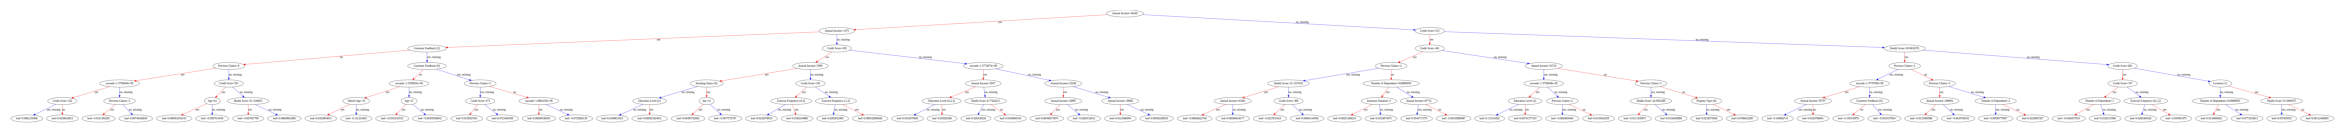

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import cv

df = df_raw.copy()

# Premium Amount to target
X, y = df.drop(columns=["Premium Amount"]), df["Premium Amount"]

# Ekstrakcja cech kategorycznych
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Konwersja na typ 'Category'
for col in cats:
   X[col] = X[col].astype('category')
   df_test[col] = df_test[col].astype('category')

X.dtypes

# Podział na test i train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Macierze danych
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
dwhole_reg = xgb.DMatrix(X, y, enable_categorical=True)

# Lista zestawów danych do cross-validacji
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

# Domyślne parametry
params = {"objective": "reg:squarederror", "device": "cuda"}


# Trening z użyciem Early Stopping
n = 10000
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=250,
   early_stopping_rounds=100
)

# Wyniki treningu
print(f"Best model score: {model.best_score:.3f}")
print(f"Best model training iteration number: {model.best_iteration:.3f}")

# Cross-Validacja modelu
res = cv(dtrain=dwhole_reg, params=params, nfold=5,
         num_boost_round=model.best_iteration)

print(f"MIN ERROR: {res['test-rmse-mean'].min()}")

n = model.best_iteration
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

# Jedno drzewo decyzyjne
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

W ten sposób uzyskaliśmy bazowy wynik na Cross-Validacji równy **1.0467906372312517**

## Outliery

Następnie zbadaliśmy wpływ usunięcia outlierów na wynik cross-validacji. Skorzystaliśmy z klasy **OutlierTrimmer** biblioteki **feature_engine**. Zbadaliśmy cztery metody:
1.   Gaussian
2.   IQR
3.   MAD
4.   Quantile


Cross-validację nadal sprawdzaliśmy na modelu z domyślnymi parametrami. Wyniki przedstawiamy poniżej:
1.   Gaussian: 1.0501704978658224 (bez outlierów), 1.0470595099698425 (na wszystkich danych)
2.   IQR: 1.0426732277530073 (bez outlierów), 1.0469447287971883 (na wszystkich danych)
3.   MAD: 1.045382808599294 (bez outlierów), 1.0469447287971883 (na wszystkich danych)
4.   Quantile: 1.0035098237190156 (bez outlierów), 1.047267374868877 (na wszystkich danych)

Jak widać usunięcie outlierów w prawie wszystkich przypadkach dało lepszy wynik cross-validacji na danych bez nich, zatem model drzewiasty z biblioteki XGBoost radzi sobie lepiej na danych bez dużych dewiacji. Poniżej przedstawiamy jednak procentowo wynik cross-validacji na całym zestawie danych względem bazowego modelu:

1.   Gaussian: +0.0257 %
2.   IQR: +0.0147 %
3.   MAD: +0.0147 %
4.   Quantile: +0.0455 %

Jak widać - w każdym przypadku usunięcie outlierów nieco pogorszyło wynik modelu. Naszym celem było oczywiście stworzenie modelu, który zachowuje się średnio dobrze dla każdego zestawu danych, również z outlierami, dlatego na podstawie powyższych wyników odrzuciliśmy usuwanie outlierów.




## Encoding cech kategorycznych

Zbadaliśmy również wpływ zastosowania dwóch różnych encodingów cech nienumerycznych: **Target Encoding** oraz **One hot encoding**. Wszystko porównywaliśmy oczywiście względem tego samego bazowego modelu co wcześniej. Do One Hot Encoding dodatkowo zastosowaliśmy kodowanie które usuwa kolumnę reprezentującą pierwszą cechę (gdyż same zera w innych cechach już ją implikują; bez tego kolumny te byłyby liniowo zależne). Wyniki przedstawiamy poniżej:

1.   Target Encoding: 1.0464698407985074
2.   One Hot Encoding: 1.0465525177989843

oraz procentowo względem bazowego modelu:

1.   Target Encoding: -0.0306 %
2.   One Hot Encoding: -0.0227 %

Zatem w tym wypadku Target Encoding sprawdził się nawet lepiej niż One Hot i oba kodowania poprawiły bazowy wynik o około 0.02 - 0.03%

## Imputacja brakujących danych

Kolejną rzecz jaką zbadaliśmy, pomimo domyślnej obsługi missing values przez XGBoost, to wpływ róznych form imputowania brakujących danych na wynik modelu. Dla numerycznych zbadaliśmy trzy imputery z biblioteki Scikit-Learn:


1.   Mean
2.   Median
3.   Most frequent

Wyniki (procentowo względem modelu bazowego) poniżej:

1.   Mean: +0.116 %
2.   Median: +0.135 %
3.   Most frequent: +0.346 %

Zatem dla cech numerycznych imputacja brakujących danych nieco pogorszyła wynik.

Dla cech kategorycznych użyliśmy jedynie imputację typu Most frequent. Wynik poniżej:

Cechy kategoryczne - most frequent: +0.46 %

Imputacja cech kategorycznych więc najbardziej popsuła wynik bazowego modelu

Można stąd więc wywnioskować, iż brakujące dane też coś znaczą w kontekście przewidywania wysokości składki.

## Inżynieria cech

Ostatnią rzecz jaką zbadaliśmy, to spróbowaliśmy utworzyć nowe cechy na podstawie już obecnych, aby zwiększyć nieco informatywność zestawu danych.
Oto cechy jakie dodaliśmy:
1. Age Group - kategoria grup wiekowych (młody, średni, stary)
2. Income Category - kategoria przychodu, podział na kwantyle
3. Dependents Binary - czy dependents > 0
4. Marital-Dependents Interaction - połączenie 3. i stanu cywilnego
5. Vehicle Age Category - kategorie wiekowe pojazdów (nowy, średni, stary)
6. Claim Ratio - stosunek liczby poprzednich roszczeń do czasu trwania polisy
7. Exercise Frequency Numeric - mapowanie częstości ćwiczeń na liczby
8. Credit Score Category - podział na 3 kwantyle (Low, Medium, High)
9. High-Risk Profile - połączenie Health-Score, Smoking-Status i Credit-Score
10. Property-Location - połączenie typu posiadłości z lokalizacją

dodanie wszystkich powyższych cech polepszyło wynik względem bazowego modelu o -5.71e-05 %. Postaraliśmy się zatem zmaksymalizować zysk z dodania cech, badając wpływ usunięcia każdej z dodanych. Finalnie tym sposobem zostawiliśmy jedynie cztery: 1, 3, 4, oraz 6 co dało nam procentowy zysk -0.00609 %. Zatem udało się uzyskać co prawda niewielką poprawę, ale dało nam to kolejną strategię polepszającą wynik bazowego modelu do późniejszych badań.
  

## Pary różnych oraz trójka strategii

Podsumowując poprzednie rozdziały, jedynie trzy strategie polepszyły wynik bazowego modelu: One Hot Encoding, Target Encoding oraz Feature Engineering. Postanowiliśmy zastosować je zatem jednocześnie - najpierw parami, potem wszystkie naraz. Wyniki przedstawiamy poniżej (procentowo względem modelu bazowego):

1. one_hot_encoding + target_encoding: -0.0306 %

2. one_hot_encoding + feature_engineering: -0.0342 %

3. target_encoding + feature_engineering: -0.0301 %

4. one_hot_encoding + target_encoding + feature_engineering: -0.0293 %

Wszystkie kombinacje strategii poprawiły zatem wynik modelu, a najlepiej sprawdziła się kombinacja One Hot Encoding z Inżynierią Cech dająca poprawę błędu RMSLE rzędu 0.03%.

## Kody skryptów użytych do encodingów, imputerów oraz feature_engineering

In [ ]:
def feature_eng(raw_data):
  # Dodatkowa inżynieria Cech
  # 'Daily' 'Monthly' 'Rarely' 'Weekly'
  df = raw_data.copy()

  # Grupowanie wieku
  bins = [0, 25, 50, 100]
  labels = ['Young', 'Middle-Aged', 'Senior']
  df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

  # Grupowanie dochodów
  # df['Income Category'] = pd.qcut(df['Annual Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

  # Czy klient ma osoby na utrzymaniu?
  df['Dependents Binary'] = df['Number of Dependents'].apply(lambda x: 1 if x > 0 else 0)

  # Interakcja statusu cywilnego i liczby osób na utrzymaniu
  df['Marital-Dependents Interaction'] = df['Marital Status'] + '_' + df['Dependents Binary'].astype(str)

  # Kategoryzacja wieku pojazdu
  bins_vehicle = [0, 3, 10, 100]
  labels_vehicle = ['New', 'Medium', 'Old']
  # df['Vehicle Age Category'] = pd.cut(df['Vehicle Age'], bins=bins_vehicle, labels=labels_vehicle)

  # Stosunek roszczeń do czasu trwania polisy
  df['Claim Ratio'] = df['Previous Claims'] / df['Insurance Duration']
  # df['Claim Ratio'].fillna(0, inplace=True)

  # Konwersja częstotliwości ćwiczeń na wartości numeryczne
  exercise_map = {'Never': 0, 'Rarely': 1, 'Monthly': 2, 'Weekly': 3, 'Daily': 4}
  # df['Exercise Frequency Numeric'] = df['Exercise Frequency'].map(exercise_map)
  # df['Exercise Frequency Numeric'].fillna(0, inplace=True)

  # Kategoryzacja Credit Score
  # df['Credit Score Category'] = pd.qcut(df['Credit Score'], q=3, labels=['Low', 'Medium', 'High'])

  # Połączenie ryzyka zdrowotnego
  # df['High-Risk Profile'] = ((df['Health Score'] < df['Health Score'].median()) & (df['Smoking Status'] == 'Smoker') & (df['Credit Score Category'] == 'Low')).astype(int)

  # Połączenie rodzaju nieruchomości z lokalizacją
  # df['Property-Location'] = df['Property Type'] + '_' + df['Location']


  df.info()
  return df
df = feature_eng(df_raw)
df_test = feature_eng(df_test)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import QuantileTransformer
from feature_engine.outliers import OutlierTrimmer

# Extract text features and numerical features
# df = df_raw.copy()
# X_whole, y_whole = df.drop(columns="Premium Amount"), df["Premium Amount"]
# ot = OutlierTrimmer(capping_method='quantiles', missing_values='ignore')

# df = ot.fit_transform(df)
X, y = df.drop(columns="Premium Amount"), df["Premium Amount"]
cats = X.select_dtypes(exclude=np.number).columns.tolist()
nums = X.select_dtypes(include=np.number).columns.tolist()


# # Convert to Pandas category
# for col in cats:
#    X[col] = X[col].astype('category')
#    X_whole[col] = X_whole[col].astype('category')
#    # df_test[col] = df_test[col].astype('category')

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

cat_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output = False, dtype='int', drop='first'))
])

target_transformer = Pipeline([
    ('encoder', TargetEncoder())
])

preprocessor = ColumnTransformer([
    # ('num', num_transformer, nums),
    ('cat', cat_transformer, cats),
    # ('target', target_transformer, cats)
], remainder='passthrough').set_output(transform='pandas')

preprocessor.fit(X, y)
X = preprocessor.transform(X)


df_test = preprocessor.transform(df_test)
X.info()

# X_whole.info()

## Optymalizacja hiperparametrów

Ostatnią rzeczą, jaką zrobiliśmy dla modelu XGBoost, była optymalizacja hiperparametrów. Użyliśmy do tego biblioteki **hyperopt** i algorytmu **Tree of Parzen Estimators**
Optymalizowaliśmy następujące parametry:

1. max_depth - głębokość drzewa
2. gamma - parametr regularyzacyjny, minimalna redukcja funkcji straty, aby dodać podział węzłą
3. reg_alpha - parametr regularyzacyjny, redukuje wartości współczynników cech
4. reg_lambda - parametr regularyzacyjny, penalizuje duże wagi cech
5. colsample_bytree - procent cech wybieranych losowo do każdego drzewa
6. min_child_weight - minimalna suma wag próbek w liściu
7. eta - learning rate
8. subsample -  procent próbek wybieranych losowo do każdego drzewa



In [ ]:
from hyperopt import hp
from xgboost import cv

def obj(space):
  evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

  params = {"objective": "reg:squarederror",
            "device": "cuda",
            'max_depth': int(space['max_depth']),
            'gamma': space['gamma'],
            'reg_alpha' : space['reg_alpha'],
            'reg_lambda' : space['reg_lambda'],
            'colsample_bytree' : space['colsample_bytree'],
            'min_child_weight' : space['min_child_weight'],
            'eta': space['eta'],
            'subsample': space['subsample']}
  n = 10000
  model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    early_stopping_rounds=100,
    verbose_eval=250
  )

  # cross validation
  res = cv(dtrain=dwhole_reg, params=params, nfold=5,
           num_boost_round=model.best_iteration)
  min_err = res["test-rmse-mean"].min()
  print(f"MIN ERROR: {min_err}")
  return min_err


space={'max_depth': hp.quniform("max_depth", 3, 16, 1),
        'gamma': hp.uniform ('gamma',0,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.5,1,0.01),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'eta': hp.quniform('eta', 0.01, 0.2, 0.01),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.01)
    }

from hyperopt import fmin, tpe

best_parameters = fmin(obj, space, algo=tpe.suggest, max_evals=100)
print(best_parameters)


Ostatecznie dobrane najlepsze wartości parametrów to:
* 'colsample_bytree': 0.98,
* 'eta': 0.01,
* 'gamma': 3.1021839535015805,
* 'max_depth': 14,
* 'min_child_weight': 6.0,
* 'reg_alpha': 81.0,
* 'reg_lambda': 0.8270044691823938,
* 'subsample': 0.86

## Ostateczny trening i predykcja danych testowych do submission

Ostatecznie wytrenowaliśmy model z takimi parametrami:

In [ ]:
import xgboost as xgb
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
dwhole_reg = xgb.DMatrix(X, y, enable_categorical=True)

import matplotlib.pyplot as plt
from xgboost import cv
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

params = {"objective": "reg:squarederror", "device": "cuda", "booster": "gbtree",
          #  'colsample_bytree': 0.9, 'eta': 0.04, 'gamma': 3.0426331395339887, 'max_depth': 15, 'min_child_weight': 7.0, 'reg_alpha': 86.0, 'reg_lambda': 0.41047541462827974, 'subsample': 0.92}
          'colsample_bytree': 0.98, 'eta': 0.01, 'gamma': 3.1021839535015805, 'max_depth': 14, 'min_child_weight': 6.0, 'reg_alpha': 81.0, 'reg_lambda': 0.8270044691823938, 'subsample': 0.86}

n = 10000
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=250,
   early_stopping_rounds=25
)

print(model.feature_names)

print(f"Best model score: {model.best_score:.3f}")
print(f"Best model training iteration number: {model.best_iteration:.3f}")

# cross validation

res = cv(dtrain=dwhole_reg, params=params, nfold=5,
         num_boost_round=model.best_iteration)

print(res.head())
print(f"MIN CV: {res['test-rmse-mean'].min()}")

n = model.best_iteration
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

xgb.plot_tree(model, num_trees=4)
xgb.plot_importance(model)

Udało się finalnie uzyskać błąd RMSLE na cross-validacji równy 1.045349645907023, co względem bazowego modelu procentowo wyraża się jako -0.138 % poprawy.

Finalnie zrobiliśmy predykcję danych, które należało zgłosić jako submission na Kaggle i porównaliśmy wynik takiego submisson - otrzymanego z bazowego modelu, jak i tego po optymalizacjach.

In [ ]:
dsubm = xgb.DMatrix(df_test)

y = model.predict(dsubm)
sol = pd.DataFrame(columns=["Premium Amount"])
sol["Premium Amount"] = y
sol["Premium Amount"] = np.expm1(sol["Premium Amount"])
sol.index = df_test_raw["id"]
sol.to_csv("solution.csv")
sol

Wyniki na Kaggle dla bazowego i najlepszego modelu to:
Bazowy: 1.04816 - 675 miejsce
Najlepszy: 1.04661 - 435 miejsce



# ***Pytorch***

## Ładowanie danych
Ponownie wstępnym etapem było odpowiednie ładowanie danych wraz z ich preprocessingiem. Aby niektóre modyfikacje dało się wykonać jednocześnie na części train oraz test, dokonaliśmy tymczasowego podziału cech z pliku train.csv i test.csv. Wspólnie na nich dokonaliśmy następujących konwersji:
- podział daty na cechy "Year", "Month", "Day". Po dalszych testach i modyfikacjach stwierdziliśmy, że lepiej jest dodać czwartą kategorię "Microsecond", która określa część ułamkową sekundy. Bez niej model działał nieco gorzej,
- pozbycie się pustych pól - wiele wierszy okazało się niekompletnych. Aby temu zaradzić, zamieniliśmy je na: medianę dla danych liczbowych, nową kategorię "Unknown" dla danych kategorycznych.
Następnie, zakodowaliśmy dane kategoryczne, aby były zapisane w formacie numerycznym. Wykorzystaliśmy do tego One Hot Encoding, wbudowany w bibliotekę pandas, czyli funkcję pd.get_dummies(). Początkowo bez, potem przetestowaliśmy usuwanie outlier'ów, które, jak się potem okazało, znacząco poprawiło działanie sieci. Dokonaliśmy podziału danych na osobną część do trenowania i do walidacji. Przed finalnym dodaniem danych do sieci wykonaliśmy standaryzację za pomocą funkcji StandardScaler z modułu sklearn.preprocessing.

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer

# Import danych
train = pd.read_csv("/content/drive/MyDrive/dane do golema/train.csv")
test = pd.read_csv("/content/drive/MyDrive/dane do golema/test.csv")
train_y = train["Premium Amount"]
train_X = train.drop(columns=["Premium Amount"], axis=1)
num_train, num_test = len(train_X), len(test)

# Odpowiednia konkatenacja cech z train i test, by wspólnie na nich wykonać
# preprocessing
df = pd.concat([train_X, test])

# Rozdzielenie daty na Year - Month - Day - Microsecond
df["Policy Start Date"] = pd.to_datetime(df["Policy Start Date"])
df["Year"] = df["Policy Start Date"].dt.year
df["Month"] = df["Policy Start Date"].dt.month
df["Day"] = df["Policy Start Date"].dt.day
df["Microsecond"] = df["Policy Start Date"].dt.microsecond
df.drop(columns=["Policy Start Date", "id"], inplace=True)

# Pozbycie się pustych pól
cat_columns = df.select_dtypes(include=["object"]).columns
df[cat_columns] = df[cat_columns].fillna("Unknown")
df.fillna(train.median(numeric_only=True), inplace=True)

# One Hot Encoding
df = pd.get_dummies(df, columns=cat_columns, dtype='int', drop_first=True)

# Usuwanie outlier'ów
train_features, test_features = df[:num_train], df[num_train:]
trimmer = OutlierTrimmer(capping_method="iqr", fold=1.5,
                         variables=["Age", "Annual Income", "Vehicle Age",
                                    "Health Score","Credit Score"])
train_features = trimmer.fit_transform(train_features)
train_indices = train_features.index
train_y = train_y.loc[train_indices]

# Podział na część do trenowania i do walidacji
X_train, X_val, y_train, y_val = train_test_split(train_features, train_y,
                                                  test_size=0.1, random_state=7)

# Skalowanie danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Utworzenie modelu sieci neuronowej
Podobnie jak wcześniej, tutaj również za funkcję straty przyjęliśmy Root Mean Squared Logarithmic Error. Aby nie logarytmować za każdym razem wyników, przed wprowadzeniem do modelu zlogarytmowaliśmy wyniki "Premium Amount", czyli nasze targety. Po kilku testach doszliśmy do wniosku, że warto sprawić by wymusić na modelu pierwszeństwo korzystania z GPU zamiast CPU. Mapujemy dane na tensory, a następnie na obiekty TensorDataset i na koniec DataLoader, które są następnie ładowane do modelu. Potem, dokonaliśmy zdefiniowania modelu sieci neuronowej, stosowanej do naszej regresji. W tym kroku musieliśmy dużo pokombinować, by wybrać najodpowiedniejsze hiperparametry, dzięki którym model będzie w naszym przypadku najwydajniejszy. Wybraliśmy ostatecznie model o 5 warstwach liniowych. Za funkcję straty wybraliśmy MSELoss(), która jest najbliższa naszej rozpatrywanej RMSLE (będziemy ją potem mapować na nią). Optimizatorem został jeden z najpopularniejszych optim.Adam(), a za learning rate po kilku testach obraliśmy 0.01. Aby lr nie pozostawał stały, tylko zmieniał się dynamicznie w zależności od potrzeb, wprowadziliśmy odpowiedni harmonogram scheduler. Po eksperymentach stwierdziliśmy, że najlepszym dla naszego modelu danych okazał się harmonogram cosinusoidalny CosineAnnealingLR, który jest częściej stosowany do dłuższych treningów.

In [ ]:
# Przygotowanie obiektów DataSet i DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.log1p(torch.tensor(y_train.values, dtype=torch.float32)).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.log1p(torch.tensor(y_val.values, dtype=torch.float32)).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
testval_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
testval_loader = DataLoader(testval_dataset, batch_size=4096, shuffle=False)

# Model wykorzystywany do regresji
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.SiLU(),
            nn.Linear(64, 32),
            nn.SiLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

model = RegressionModel(input_size=X_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=0.0002)

## Trening i walidacja
Wykonaliśmy standardowy trening modelu sieci neuronowej, połączonym z walidacją. Po kilku eksperymentach doszliśmy do wniosku, że najodpowiedniejszą liczbą epok jest 50 i taką ostatecznie zastosowaliśmy. Należało również uwzględnić fakt, że funkcja straty to nadal MSELoss, a chcemy zastosować RMSLE. Jednak jak wcześniej wspomnieliśmy, zlogarytmowaliśmy kolumnę targetów. Wystarczy więc obliczyć sumę wszystkich MSE obliczonych w danej epoce przez długość batchy, w których konkretne dane się znajdują, a następnie tę sumę podzielić przez długość Dataset'u, by na koniec spierwiastkować. Otrzymujemy więc funkcję straty RMSE obliczaną dla całego zbioru danych. Uwzględniając fakt, że targety są zlogarytmowane, otrzymujemy funkcję straty RMSLE, na której się opieramy. Po treningu w epoce przystępujemy do walidacji obecnego modelu, czyli analogicznie sprawdzamy, ile wynosi RMSLE, lecz tym razem dla zbioru testowego (testval). Najważniejszym punktem jest określenie, czy udało nam się poprawić działanie modelu. Jeżeli tak, to zapisujemy jego stan i nadpisujemy wartość "najlepszej" funkcji straty. Po przejściu przez pętlę otrzymujemy gotowy model.

In [ ]:
# Trenowanie + walidacja
def train_and_validate(model, train_loader, testval_loader, epochs):
    best_testval_loss = float('inf')
    best_model_path = "/content/drive/MyDrive/dane do golema/best_model.pth"

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for features, targets in train_loader:
            features, targets = features.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(features).squeeze()
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * features.size(0)

        train_loss = (train_loss / len(train_loader.dataset)) ** 0.5
        scheduler.step()

        model.eval()
        testval_loss = 0.0
        with torch.no_grad():
            for features, targets in testval_loader:
                features, targets = features.to(device), targets.to(device)
                outputs = model(features).squeeze()
                loss = criterion(outputs, targets)
                testval_loss += loss.item() * features.size(0)

        testval_loss = (testval_loss / len(testval_loader.dataset)) ** 0.5
        print(f"Epoch {epoch+1}/{epochs}, Train RMSLE: {train_loss:.4f}, TestVal RMSLE: {testval_loss:.4f}")

        if testval_loss < best_testval_loss:
            best_testval_loss = testval_loss
            torch.save(model.state_dict(), best_model_path)


train_and_validate(model, train_loader, testval_loader, epochs=50)

Epoch 1/50, Train RMSLE: 1.1656, TestVal RMSLE: 1.0728
Epoch 2/50, Train RMSLE: 1.0660, TestVal RMSLE: 1.0642
Epoch 3/50, Train RMSLE: 1.0625, TestVal RMSLE: 1.0625
Epoch 4/50, Train RMSLE: 1.0612, TestVal RMSLE: 1.0611
Epoch 5/50, Train RMSLE: 1.0604, TestVal RMSLE: 1.0649
Epoch 6/50, Train RMSLE: 1.0599, TestVal RMSLE: 1.0603
Epoch 7/50, Train RMSLE: 1.0588, TestVal RMSLE: 1.0608
Epoch 8/50, Train RMSLE: 1.0587, TestVal RMSLE: 1.0596
Epoch 9/50, Train RMSLE: 1.0579, TestVal RMSLE: 1.0589
Epoch 10/50, Train RMSLE: 1.0567, TestVal RMSLE: 1.0602
Epoch 11/50, Train RMSLE: 1.0560, TestVal RMSLE: 1.0567
Epoch 12/50, Train RMSLE: 1.0537, TestVal RMSLE: 1.0543
Epoch 13/50, Train RMSLE: 1.0521, TestVal RMSLE: 1.0516
Epoch 14/50, Train RMSLE: 1.0506, TestVal RMSLE: 1.0538
Epoch 15/50, Train RMSLE: 1.0492, TestVal RMSLE: 1.0525
Epoch 16/50, Train RMSLE: 1.0486, TestVal RMSLE: 1.0510
Epoch 17/50, Train RMSLE: 1.0482, TestVal RMSLE: 1.0502
Epoch 18/50, Train RMSLE: 1.0480, TestVal RMSLE: 1.0496
E

## Zapis wyników dla test.csv. Ocena jakości modelu
Na sam koniec chcemy faktycznie ocenić jakość przygotowanej sieci, korzystając ze strony konkursowej, gdyż można w dowolnej chwili wysłać plik z wynikami do automatycznej oceny. W tym celu posługujemy się zapisem pliku test.csv oraz zapisanym stanem najlepszego modelu. Zapisujemy wyniki w osobnym pliku .csv, specjalnie przygotowanym do przesłania do oceny. Wyniki dla tego samego programu (tj. te same kroki preprocessingu i dobór hiperparametrów) mogą odbiegać od siebie, co jest skutkiem randomizacji wielu procesów uczenia się sieci.

In [ ]:
# Utworzenie ocenianego pliku submission.csv na podstawie danych testowych (test.csv)
X_test = scaler.transform(test_features)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=4096, shuffle=False)

model.load_state_dict(torch.load("/content/drive/MyDrive/dane do golema/best_model.pth", map_location=device))
model.eval()

outputs = []
with torch.no_grad():
    for batch in test_loader:
        features = batch[0].to(device)
        outputs.append(model(features).squeeze().cpu().numpy())

outputs = np.concatenate(outputs)
outputs = np.expm1(outputs)

print(outputs)

sub = pd.read_csv("/content/drive/MyDrive/dane do golema/sample_submission.csv")
sub["Premium Amount"] = outputs
sub.to_csv("/content/drive/MyDrive/dane do golema/submission.csv", index=False)

<ipython-input-6-c0910cf27640>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/dane do golema/best_model.pth", map_

[821.549   792.95233 814.8794  ... 831.94763 748.6658  844.86865]


## Wyniki modelu
Nasz początkowy stan modelu wybraliśmy, kierując się wiedzą z wykładów, ale również podpierając się podobnymi przykładami oraz filozofią wyboru hiperparametrów, tj. które rozwiązania są najpopularniejsze i kiedy należy ich użyć. Jak się okazało, już na samym początku model spisywał się dość dobrze, pomimo uboższego preprocessingu (o którym zaraz powiemy) i wynik, jaki uzyskał na stronie wynosił 1.05902.

Finalnie niewiele skorygowaliśmy model końcowy względem początkowego, jeśli mówimy o hiperparametrach. Nie wykorzystywaliśmy również zasobów GPU. Po testach uznaliśmy przede wszystkim, że dobór ilości warstw był optymalny, tak samo jak sam kształt sieci. Zbędne okazały się takie udogodnienia jak dodatkowa warstwa liniowa, czy dodanie dropoutów przy zejściu do kolejnej warstwy. Dokonaliśmy jeszcze kilku testów. Oto wyniki, jakie uzyskaliśmy:
1.	Początkowy stan – 1.05902
2.	Zmiana warstw aktywacji na same ReLU – 1.06536
3.	Stan początkowy, ale z przejściem na GPU – 1.05930
4.	Mniejszy learning rate (0.001) – 1.06791
5.	Większy learning rate (0.01) – 1.05743
6.	Jeszcze większy learning rate (0.012) – 1.05771
7.	Dodatkowa warstwa liniowa – 1.06964
8.	Dodanie dropoutów (0.2) – 1.06656
9.	Zmiana optimizera na AdamW – 1.06052.

Wykonaliśmy łącznie 8 testów. Jak widać, to, co udało nam się jedynie zoptymalizować wielkość początkowego learning rate, który wstępnie wynosił 0.007. Zwiększenie go o zaledwie 0.003 pozwoliło uzyskać znacznie lepszy wynik, niż otrzymaliśmy na początku. To, co również widać to fakt, że samo przejście na GPU nie zmieniło jakości modelu, jednak zauważalnie polepszyło jego wydajność. To są jedyne zmiany, jakich dokonaliśmy w modelu. Zmieniliśmy jednak bardziej preprocessing. (Nie uwzględniliśmy ich w tych testach)

Na początku, nasz preprocessing był mniej skomplikowany. Zawierał zastąpienie pustych pól, encoding (One Hot Encoding) i standaryzację. Przekształcenie dat też było mniej zaawansowane i składało się tylko z kategorii "Year" "Month", "Day".

Dokonaliśmy więc modyfikacji, mających na celu usprawnienie preprocessingu oraz przetestowanie tych zmian w działaniu sieci. Oto wyniki i testy, jakie przeprowadziliśmy:

1.	Zamiana standaryzacji na MinMaxScaler – 1.06653
2.	Dodanie funkcji OutlierTrimmer (IQR, fold=1.5) – 1.05713
3.	Przetestowanie TargetEncoding (nie zamiana, a dodatkowe podstawienie nowych kolumn, pochodzących z Target Encodingu) – 1.06738
4.	Dodanie nowych kolumn Hour, Minute, Second (z microseconds) – 1.05807
5.	Usunięcie kolumn Hour, Minute; przekształcenie kolumny Second na Microsecond, zawierającą tylko część ułamkową sekund– 1.05789
6.	Zamiana "capping_method" Outlier Trimmer na "quantiles", z wartością fold=0.05 – 1.06342.

Jak widać, nie wszystkie zmiany preprocessingu przyniosły polepszenie jakości modelu. Najbardziej zauważalną na korzyść zmianą było dodanie procesu usuwania outlierów za pomocą funkcji OutlierTrimmer z biblioteki feature_engine. Za metodę, która miała usuwać outliery postawiliśmy metodę IQR. Przetestowana była również metoda kwantyli (quantiles), która jednak osiągnęła znacznie gorszy wynik. Po kilku testach doszliśmy do wniosku, że dodanie kolumny Microseconds pochodzącej od "Policy Start Date" również nieco polepsza zachowanie sieci, więc finalnie zostawiliśmy tę zmianę. Koniec końców wyniki naszego modelu regresji bazującym na bibliotece PyTorch oscylują w przedziale od 1.057 do 1.058, posługując się stroną konkursową Kaggle.


# Ensembling

Dane:
- SimpleImputer - mean
-

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.utils.estimator_checks import check_estimator
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import cv
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer
import copy
import pickle

train_path = "/content/drive/MyDrive/dane do golema/train.csv"
test_path = "/content/drive/MyDrive/dane do golema/test.csv"

df_raw = pd.read_csv(train_path)

df_test_raw = pd.read_csv(test_path)

X, y = df_raw.drop(columns="Premium Amount"), df_raw["Premium Amount"]

y = np.log1p(y)

In [ ]:
class Stacker(BaseEstimator):
  def __init__(self, estimators, final_estimator):
    self.estimators = estimators
    self.final_estimator = final_estimator
  def fit(self, X, y):
    Y = pd.DataFrame()
    for estimator in self.estimators:
      estimator.fit(X, y)
      Y = pd.concat((Y, pd.DataFrame(data=estimator.predict(X, y))), axis=1)
    print(Y)
    self.final_estimator.fit(Y, y)
  def predict(self, X, y):
    Y = pd.DataFrame()
    for estimator in self.estimators:
      Y = pd.concat((Y, pd.DataFrame(data=estimator.predict(X, y))), axis=1)
    return self.final_estimator.predict(Y)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class RegressionModel(nn.Module):
        def __init__(self, input_size):
            super(RegressionModel, self).__init__()
            self.fc = nn.Sequential(
                nn.Linear(input_size, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.SiLU(),
                nn.Linear(64, 32),
                nn.SiLU(),
                nn.Linear(32, 32),
                nn.ReLU(),
                nn.Linear(32, 1)
            )

        def forward(self, x):
            return self.fc(x)

In [ ]:
class PyTorchRegressor(RegressorMixin, BaseEstimator):
    def __init__(self, X, params=1):
        self.params = None
        self.model = None
        self.best_model = None
    def __sklearn_is_fitted__(self):
      return True

    def preprocess(self, X, y):
        y = pd.DataFrame(data=y)
        # Rozdzielenie daty na Year - Month - Day - Microsecond
        X["Policy Start Date"] = pd.to_datetime(X["Policy Start Date"])
        X["Year"] = X["Policy Start Date"].dt.year
        X["Month"] = X["Policy Start Date"].dt.month
        X["Day"] = X["Policy Start Date"].dt.day
        X["Microsecond"] = X["Policy Start Date"].dt.microsecond
        X.drop(columns=["Policy Start Date", "id"], inplace=True)

        # Pozbycie się pustych pól
        cat_columns = X.select_dtypes(include=["object"]).columns
        X[cat_columns] = X[cat_columns].fillna("Unknown")
        X.fillna(X.median(numeric_only=True), inplace=True)

        # One Hot Encoding
        X = pd.get_dummies(X, columns=cat_columns, dtype='int', drop_first=True)

        # Standaryzacja danych
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        return X, y

    def train_and_validate(self, model, train_loader, testval_loader, optimizer, criterion, scheduler, epochs):
      best_testval_loss = float('inf')
      best_model_state = None

      for epoch in range(epochs):
          model.train()
          train_loss = 0.0
          for features, targets in train_loader:
              features, targets = features.to(device), targets.to(device)
              optimizer.zero_grad()
              outputs = model(features).squeeze()
              loss = criterion(outputs, targets)
              loss.backward()
              optimizer.step()
              train_loss += loss.item() * features.size(0)

          train_loss = (train_loss / len(train_loader.dataset)) ** 0.5
          scheduler.step()

          model.eval()
          testval_loss = 0.0
          with torch.no_grad():
              for features, targets in testval_loader:
                  features, targets = features.to(device), targets.to(device)
                  outputs = model(features).squeeze()
                  loss = criterion(outputs, targets)
                  testval_loss += loss.item() * features.size(0)

          testval_loss = (testval_loss / len(testval_loader.dataset)) ** 0.5

          if testval_loss < best_testval_loss:
              best_testval_loss = testval_loss
              best_model_state = copy.deepcopy(model.state_dict())
      self.best_model.load_state_dict(best_model_state)

    def fit(self,X: pd.DataFrame,y: pd.Series):
      X, y = self.preprocess(X, y)
      device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

      # Podział na część do trenowania i do walidacji
      X_train, X_val, y_train, y_val = train_test_split(train_features, train_y,
                                                    test_size=0.1, random_state=7)

      # Przygotowanie obiektów DataSet i DataLoader
      X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
      y_train_tensor = torch.log1p(torch.tensor(y_train.values, dtype=torch.float32)).to(device)
      X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
      y_val_tensor = torch.log1p(torch.tensor(y_val.values, dtype=torch.float32)).to(device)

      train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
      testval_dataset = TensorDataset(X_val_tensor, y_val_tensor)

      train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
      testval_loader = DataLoader(testval_dataset, batch_size=4096, shuffle=False)

      model = RegressionModel(input_size=X_train.shape[1]).to(device)
      criterion = nn.MSELoss()
      optimizer = optim.Adam(model.parameters(), lr=0.01)
      scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=0.0002)


      train_and_validate(self, model, train_loader, testval_loader, optimizer, criterion, scheduler, epochs=50)

    def predict(self, X: pd.DataFrame, y: pd.Series = None):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X, _ = self.preprocess(X, y if y is not None else pd.Series(np.zeros(len(X))))
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        test_dataset = TensorDataset(X_tensor)
        test_loader = DataLoader(test_dataset, batch_size=4096, shuffle=False)
        if self.best_model is None:
            self.best_model = RegressionModel(input_size=X.shape[1]).to(device)
            self.best_model.load_state_dict(torch.load("/content/drive/MyDrive/dane do golema/best_model.pth", map_location=device))
        self.best_model.eval()
        outputs = []
        with torch.no_grad():
            for batch in test_loader:
                features = batch[0]
                outputs.append(self.best_model(features).squeeze().cpu().numpy())

        outputs = np.concatenate(outputs)
        return outputs

In [ ]:
class XGBoostRegressor(RegressorMixin, BaseEstimator):
  def __init__(self, *, params=1):
    self.params = None
    self.model = xgb.Booster()
    self.model.load_model("XGB.json")
  def __sklearn_is_fitted__(self):
    return True
  def preprocess(self,X,y):
    X["Policy Start Date"] = pd.to_datetime( X["Policy Start Date"] )
    X["year"] = X["Policy Start Date"].dt.year.astype("float32")
    X["month"] = X["Policy Start Date"].dt.month.astype("float32")
    X["day"] = X["Policy Start Date"].dt.day.astype("float32")
    X["dow"] = X["Policy Start Date"].dt.dayofweek.astype("float32")
    X["seconds"] = (X["Policy Start Date"].astype("int64") // 10**9).astype("float32")

    X = X.drop(columns=["Policy Start Date", "id"])

    # y = np.log1p(y)

    # Grupowanie wieku
    bins = [0, 25, 50, 100]
    labels = ['Young', 'Middle-Aged', 'Senior']
    X['Age Group'] = pd.cut(X['Age'], bins=bins, labels=labels)

    # Czy klient ma osoby na utrzymaniu?
    X['Dependents Binary'] = X['Number of Dependents'].apply(lambda x: 1 if x > 0 else 0)

    # Interakcja statusu cywilnego i liczby osób na utrzymaniu
    X['Marital-Dependents Interaction'] = X['Marital Status'] + '_' + X['Dependents Binary'].astype(str)

    # Kategoryzacja wieku pojazdu
    bins_vehicle = [0, 3, 10, 100]
    labels_vehicle = ['New', 'Medium', 'Old']

    # Stosunek roszczeń do czasu trwania polisy
    X['Claim Ratio'] = X['Previous Claims'] / X['Insurance Duration']

    cats = X.select_dtypes(exclude=np.number).columns.tolist()
    nums = X.select_dtypes(include=np.number).columns.tolist()

    cat_transformer = Pipeline([
        ('encoder', OneHotEncoder(sparse_output = False, dtype='int', drop='first'))
    ])

    preprocessor = ColumnTransformer([
        ('cat', cat_transformer, cats),
    ], remainder='passthrough').set_output(transform='pandas')

    preprocessor.fit(X, y)
    X = preprocessor.transform(X)

    return X, y
  def fit(self,X,y):

    X, y = self.preprocess(X, y)
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # Create regression matrices
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

    evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

    params = {"objective": "reg:squarederror", "device": "cuda", "booster": "gbtree",
               'colsample_bytree': 0.98, 'eta': 0.01, 'gamma': 3.1021839535015805, 'max_depth': 14, 'min_child_weight': 6.0, 'reg_alpha': 81.0, 'reg_lambda': 0.8270044691823938, 'subsample': 0.86}

    n = 10000
    self.model = xgb.train(
      params=params,
      dtrain=dtrain_reg,
      num_boost_round=n,
      evals=evals,
      verbose_eval=250,
      early_stopping_rounds=25
    )

    self.model = xgb.train(
        params=params,
        dtrain=dtrain_reg,
        num_boost_round=self.model.best_iteration
    )

  def predict(self,X,y=pd.DataFrame()):
    X, y = self.preprocess(X, y)
    dpred_reg = xgb.DMatrix(X)
    return self.model.predict(dpred_reg)

In [ ]:
class XGBoostRegressorDart(RegressorMixin, BaseEstimator):
  def __init__(self, *, params=1):
    self.params = None
  def __sklearn_is_fitted__(self):
    return True
  def preprocess(self,X,y):
    X["Policy Start Date"] = pd.to_datetime( X["Policy Start Date"] )
    X["year"] = X["Policy Start Date"].dt.year.astype("float32")
    X["month"] = X["Policy Start Date"].dt.month.astype("float32")
    X["day"] = X["Policy Start Date"].dt.day.astype("float32")
    X["dow"] = X["Policy Start Date"].dt.dayofweek.astype("float32")
    X["seconds"] = (X["Policy Start Date"].astype("int64") // 10**9).astype("float32")

    X = X.drop(columns=["Policy Start Date", "id"])

    # y = np.log1p(y)

    # Grupowanie wieku
    bins = [0, 25, 50, 100]
    labels = ['Young', 'Middle-Aged', 'Senior']
    X['Age Group'] = pd.cut(X['Age'], bins=bins, labels=labels)

    # Czy klient ma osoby na utrzymaniu?
    X['Dependents Binary'] = X['Number of Dependents'].apply(lambda x: 1 if x > 0 else 0)

    # Interakcja statusu cywilnego i liczby osób na utrzymaniu
    X['Marital-Dependents Interaction'] = X['Marital Status'] + '_' + X['Dependents Binary'].astype(str)

    # Kategoryzacja wieku pojazdu
    bins_vehicle = [0, 3, 10, 100]
    labels_vehicle = ['New', 'Medium', 'Old']

    # Stosunek roszczeń do czasu trwania polisy
    X['Claim Ratio'] = X['Previous Claims'] / X['Insurance Duration']

    cats = X.select_dtypes(exclude=np.number).columns.tolist()
    nums = X.select_dtypes(include=np.number).columns.tolist()

    cat_transformer = Pipeline([
        ('encoder', OneHotEncoder(sparse_output = False, dtype='int', drop='first'))
    ])

    preprocessor = ColumnTransformer([
        ('cat', cat_transformer, cats),
    ], remainder='passthrough').set_output(transform='pandas')

    preprocessor.fit(X, y)
    X = preprocessor.transform(X)

    return X, y
  def fit(self,X,y):

    X, y = self.preprocess(X, y)
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # Create regression matrices
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

    evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

    params = {"objective": "reg:squarederror", "device": "cuda", "booster": "dart"}
              # 'colsample_bytree': 0.98, 'eta': 0.01, 'gamma': 3.1021839535015805, 'max_depth': 14, 'min_child_weight': 6.0, 'reg_alpha': 81.0, 'reg_lambda': 0.8270044691823938, 'subsample': 0.86}

    n = 10000
    self.model = xgb.train(
      params=params,
      dtrain=dtrain_reg,
      num_boost_round=n,
      evals=evals,
      verbose_eval=250,
      early_stopping_rounds=25
    )

    self.model = xgb.train(
        params=params,
        dtrain=dtrain_reg,
        num_boost_round=self.model.best_iteration
    )

  def predict(self,X,y=pd.DataFrame()):
    X, y = self.preprocess(X, y)
    dpred_reg = xgb.DMatrix(X)
    return self.model.predict(dpred_reg)

In [ ]:
class CyclicFeatureEncoding(BaseEstimator, TransformerMixin):
  def __init__(self, cyclic_length):
      self.cyclic_length = cyclic_length
  def fit(self, X, y=None):
      return self
  def transform(self, X, y=None):
      X = X.values
      X = X.astype('int32')
      X_sin = np.sin(2 * np.pi * X.ravel() / self.cyclic_length).reshape(-1,1)
      X_cos = np.cos(2 * np.pi * X.ravel() / self.cyclic_length).reshape(-1,1)
      return np.concatenate([X_sin, X_cos], axis=1)

In [ ]:
class GradientBoostingTree(RegressorMixin, BaseEstimator):
  def __init__(self, *, params=1):
    self.params = None
    with open("gradient_boosting_model.pkl", "rb") as file:
      self.model = pickle.load(file)
  def __sklearn_is_fitted__(self):
    return True

  def preprocess(self,X,y):

    X["Year"] = X["Policy Start Date"].apply(lambda x: x[0:4]).astype('int32')
    X["Month"] = X["Policy Start Date"].apply(lambda x: x[5:7]).astype('int32')
    X["Day"] = X["Policy Start Date"].apply(lambda x: x[8:10]).astype('int32')
    X["Date"] = X["Policy Start Date"].apply(lambda x: x[0:10])
    X["Day_of_Week"] = pd.to_datetime(X["Date"]).dt.day_name()
    X["Time"] = X["Policy Start Date"].apply(lambda x: int(x[20:])).astype('int32')

    numerical_transformer = StandardScaler()
    numerical_scaler = Pipeline(
        steps=[
            ('imputer_num', SimpleImputer(strategy='mean',missing_values=np.nan)),
            ('scaler', numerical_transformer)
        ]
    )
    ordinal_encoder = Pipeline(
        steps=[
            ('cat_imputer',RandomSampleImputer()),
            ('ordinal_encoder',OrdinalEncoder())
        ]
    )
    ohe_encoder = Pipeline(
        steps=[
            ('cat_imputer',RandomSampleImputer()),
            ('ohe_encoder',OneHotEncoder())
        ]
    )
    cyclic_encoder_day = Pipeline(
        steps=[
            ('cyclic_encoder',CyclicFeatureEncoding(31))
        ]
    )
    cyclic_encoder_month = Pipeline(
        steps=[
            ('cyclic_encoder',CyclicFeatureEncoding(12))
        ]
    )
    transformers=[
        ('numeric_imputer',numerical_scaler,numerical_cols),
        ('ordinal_encoding',ordinal_encoder,ordinal_cols),
        ('ohe_encoding',ohe_encoder,ohe_cols)
    ]

    transformers.append(('month_encoder',cyclic_encoder_month,['Month']))

    transformers.append(('day_encoder',cyclic_encoder_day,['Month']))
    self.transformer = ColumnTransformer(transformers)
    self.df = self.transformer.fit_transform(self.df)
    return X, y

  def fit(self,X,y):

    X, y = self.preprocess(X, y)


    self.model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.2)
    self.model.fit(X, y)

  def predict(self,X,y=pd.DataFrame()):
    X, y = self.preprocess(X, y)
    return self.model.predict(X)

In [ ]:
xgb_model = XGBoostRegressor()
gbt_model = GradientBoostingTree()
nnet_model = PyTorchRegressor(df_test_raw)

y1 = xgb_model.predict(df_test_raw.copy())
# y2 = gbt_model.predict(df_test_raw.copy())
y3 = nnet_model.predict(df_test_raw.copy())

y_pred = (y1+y3)/2

print(y1)
print(y3)


# gbtree.fit(X, y)
# dart.fit(X, y)
# estim_list = [('gbtree', gbtree), ('dart', dart), ('nn', PyTorchRegressor())]
# # st = Stacker(estim_list, RidgeCV())
# # st.fit(X, y)

# # preds = st.predict(X, y)

# # print(pd.DataFrame(data=preds))
# # print(np.log1p(y))

# # print(f"ERROR: {sqrt(mean_squared_error(preds, np.log1p(y)))}")

# st = StackingRegressor(estim_list, n_jobs=-1, cv='prefit')

# st.fit(X, y)

# st.score(X, y)

In [ ]:
# KFold CV

kf = KFold(n_splits=5)
st2 = Stacker(estim_list, RidgeCV())
error = 0
for i, (train_index, test_index) in enumerate(kf.split(X)):

    print(f"Fold {i}:")
    Xf = X.iloc[train_index]
    yf = y.iloc[train_index]
    st2.fit(Xf, yf)
    preds = st2.predict(X.iloc[test_index], y.iloc[test_index])
    error += sqrt(mean_squared_error(preds, np.log1p(y.iloc[test_index])))
    print(f"ERROR: {error}")

print(f"MEAN ERROR: {error/5}")

In [ ]:
# y_pred = st.predict(df_test_raw, pd.DataFrame())
sol = pd.DataFrame(columns=["Premium Amount"])
sol["Premium Amount"] = y_pred
sol["Premium Amount"] = np.expm1(sol["Premium Amount"])
sol.index = df_test_raw["id"]
sol.to_csv("solution.csv")
sol

,Premium Amount
id,
1200000,816.437012
1200001,792.111206
1200002,809.458679
1200003,830.766113
1200004,769.355835
...,...
1999995,973.544739
1999996,620.247925
1999997,814.255249
